In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from scipy.spatial.distance import pdist, squareform, cdist
import math

In [2]:
postalTable = pd.read_csv("Postal_Data.csv")

In [3]:
X = np.array(postalTable.iloc[ : , 6:])
X

array([[  1.27582919, 103.8495764 ],
       [  1.27494969, 103.8516652 ],
       [  1.27958679, 103.8689557 ],
       ...,
       [  1.41505626, 103.9029198 ],
       [  1.41577648, 103.9047189 ],
       [  1.41583335, 103.9048246 ]])

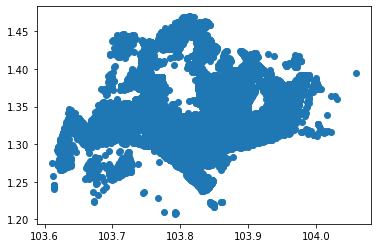

In [4]:
plt.scatter(X[:,1],X[:,0])

In [5]:
# get the mean lattitude and longtitude of the clusters, assumming n_clusters is 5
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[  1.4360932  103.82117247]
 [  1.31459505 103.85249375]
 [  1.36561233 103.95834959]
 [  1.30570089 103.77057929]
 [  1.32577759 103.94351033]
 [  1.35333337 103.8750071 ]
 [  1.31493982 103.90518371]
 [  1.40209431 103.75439326]
 [  1.31005201 103.6478148 ]
 [  1.32280135 103.80310036]
 [  1.28255049 103.83267737]
 [  1.38853596 103.8775011 ]
 [  1.37040014 103.83450226]
 [  1.3392081  103.70383173]
 [  1.35092744 103.76554402]]


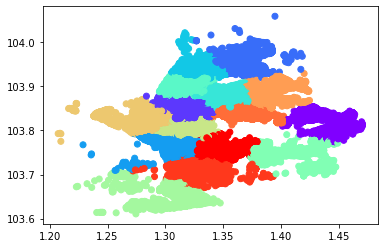

In [6]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

In [7]:
hospitals = pd.read_csv("HealthcareFacilities.csv")

In [8]:
# specify the lattitude and longtitude of the address
# distance intital as 0
hospitals['Lat1'] = 1.366382981
hospitals['Lng1'] = 103.8698868

hospitals['Distance'] = 0
hospitals

,Hospital,Region,PostalCode,Locality,Lat,Lng,Type,Lat1,Lng1,Distance
0,PCF Sparkletots Preschool @ Tanjong Pagar-Tion...,Central,85501,"1E, Cantoment Road",1.280168,103.830098,Childcare,1.366383,103.869887,0
1,Artskidz Preschool,Central,88702,"10, Raeburn Park",1.273353,103.831106,Childcare,1.366383,103.869887,0
2,PCF Sparkletots Preschool @ Telok Blangah Blk ...,Central,101078,"78A, Telok Blangah Street 32",1.273317,103.809226,Childcare,1.366383,103.869887,0
3,Nanyang Children School,Central,102078,"78B, Telok Blangah Street 32",1.273680,103.808951,Childcare,1.366383,103.869887,0
4,Bethesda (Depot Walk) Kindergarten,Central,109590,"10, Depot Walk",1.281884,103.814121,Childcare,1.366383,103.869887,0
...,...,...,...,...,...,...,...,...,...,...
317,Methodist Church Of The Incarnation (MCI) Kind...,West,688798,"31, Teck Whye Lane",1.379770,103.744553,Childcare,1.366383,103.869887,0
318,Al - Khair Mosque Kindergarten,West,688847,"1, Teck Whye Crescent",1.382596,103.741605,Childcare,1.366383,103.869887,0
319,Choa Chu Kang Bible Centre Kindergarten,West,689284,"10, Choa Chu Kang Street 52",1.394727,103.735148,Childcare,1.366383,103.869887,0
320,CGM Kindergarten,West,689457,"172, Choa Chu Kang Avenue 1",1.377069,103.737978,Childcare,1.366383,103.869887,0


In [9]:
hospitals1 = pd.DataFrame(hospitals, columns=['Lat', 'Lng', 'Lat1', 'Lng1'])

In [10]:
# calculate the Euclidean distance
distance = []
for index, row in hospitals1.iterrows():
     distance.append(math.sqrt( (row['Lat']-row['Lat1'])**2 + (row['Lng']-row['Lng1'])**2 ))

In [11]:
# append the calculated Euclidean distance to the Distance column
hospitals['Distance'] = distance
hospitals

,Hospital,Region,PostalCode,Locality,Lat,Lng,Type,Lat1,Lng1,Distance
0,PCF Sparkletots Preschool @ Tanjong Pagar-Tion...,Central,85501,"1E, Cantoment Road",1.280168,103.830098,Childcare,1.366383,103.869887,0.094954
1,Artskidz Preschool,Central,88702,"10, Raeburn Park",1.273353,103.831106,Childcare,1.366383,103.869887,0.100790
2,PCF Sparkletots Preschool @ Telok Blangah Blk ...,Central,101078,"78A, Telok Blangah Street 32",1.273317,103.809226,Childcare,1.366383,103.869887,0.111090
3,Nanyang Children School,Central,102078,"78B, Telok Blangah Street 32",1.273680,103.808951,Childcare,1.366383,103.869887,0.110937
4,Bethesda (Depot Walk) Kindergarten,Central,109590,"10, Depot Walk",1.281884,103.814121,Childcare,1.366383,103.869887,0.101242
...,...,...,...,...,...,...,...,...,...,...
317,Methodist Church Of The Incarnation (MCI) Kind...,West,688798,"31, Teck Whye Lane",1.379770,103.744553,Childcare,1.366383,103.869887,0.126047
318,Al - Khair Mosque Kindergarten,West,688847,"1, Teck Whye Crescent",1.382596,103.741605,Childcare,1.366383,103.869887,0.129302
319,Choa Chu Kang Bible Centre Kindergarten,West,689284,"10, Choa Chu Kang Street 52",1.394727,103.735148,Childcare,1.366383,103.869887,0.137688
320,CGM Kindergarten,West,689457,"172, Choa Chu Kang Avenue 1",1.377069,103.737978,Childcare,1.366383,103.869887,0.132341


In [12]:
# show the nearest hospital
dataframe_min = pd.DataFrame(hospitals, columns = ['Hospital', 'Region', 'PostalCode', 'Locality']) 
min_facility = dataframe_min[hospitals["Distance"] == hospitals["Distance"].min()]
print("Nearest hospital to the cluster")
min_facility

Nearest hospital to the cluster


,Hospital,Region,PostalCode,Locality
224,PCF Sparkletots Preschool @ Serangoon Blk 125 ...,North-East,550125,"125, Serangoon North Avenue 1"


In [13]:
# show the furthest hospital
dataframe_max = pd.DataFrame(hospitals, columns = ['Hospital', 'Region', 'PostalCode', 'Locality']) 
max_facility = dataframe_max[hospitals["Distance"] == hospitals["Distance"].max()]
print("Furthest hospital from the cluster")
max_facility

Furthest hospital from the cluster


,Hospital,Region,PostalCode,Locality
284,PCF Sparkletots Preschool @ Nanyang Blk 934 (KN),West,640934,"934, Jurong West Street 91"
